In [36]:
import numpy as np
import pandas as pd
%matplotlib inline
import yfinance as yf
import matplotlib.pyplot as plt

In [37]:
amzn =yf.Ticker("AMZN")
print(amzn)

yfinance.Ticker object <AMZN>


In [38]:
appl = yf.Ticker("AAPL")
print(appl)

yfinance.Ticker object <AAPL>


In [39]:
amzn.info

{'address1': '410 Terry Avenue North',
 'city': 'Seattle',
 'state': 'WA',
 'zip': '98109-5210',
 'country': 'United States',
 'phone': '206 266 1000',
 'website': 'https://www.aboutamazon.com',
 'industry': 'Internet Retail',
 'industryKey': 'internet-retail',
 'industryDisp': 'Internet Retail',
 'sector': 'Consumer Cyclical',
 'sectorKey': 'consumer-cyclical',
 'sectorDisp': 'Consumer Cyclical',
 'longBusinessSummary': "Amazon.com, Inc. engages in the retail sale of consumer products, advertising, and subscriptions service through online and physical stores in North America and internationally. The company operates through three segments: North America, International, and Amazon Web Services (AWS). It also manufactures and sells electronic devices, including Kindle, Fire tablets, Fire TVs, Echo, Ring, Blink, and eero; and develops and produces media content. In addition, the company offers programs that enable sellers to sell their products in its stores; and programs that allow auth

In [40]:
appl.info

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '408 996 1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryKey': 'consumer-electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and pod

In [41]:
amzn_history = amzn.history(start="2021-01-01", end="2024-05-30")
amzn_history

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-01-04 00:00:00-05:00,163.500000,163.600006,157.201004,159.331497,88228000,0.0,0.0
2021-01-05 00:00:00-05:00,158.300507,161.169006,158.253006,160.925507,53110000,0.0,0.0
2021-01-06 00:00:00-05:00,157.324005,159.875504,156.557999,156.919006,87896000,0.0,0.0
2021-01-07 00:00:00-05:00,157.850006,160.427002,157.750000,158.108002,70290000,0.0,0.0
2021-01-08 00:00:00-05:00,159.000000,159.531998,157.110001,159.134995,70754000,0.0,0.0
...,...,...,...,...,...,...,...
2024-05-22 00:00:00-04:00,183.880005,185.220001,181.970001,183.130005,28148800,0.0,0.0
2024-05-23 00:00:00-04:00,183.660004,184.759995,180.080002,181.050003,33670200,0.0,0.0
2024-05-24 00:00:00-04:00,181.649994,182.440002,180.300003,180.750000,27434100,0.0,0.0


In [42]:
appl_history = appl.history(start="2021-01-01", end="2024-05-30")
appl_history

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-01-04 00:00:00-05:00,130.858165,130.946367,124.232930,126.830101,143301900,0.0,0.0
2021-01-05 00:00:00-05:00,126.320447,129.113636,125.869611,128.398178,97664900,0.0,0.0
2021-01-06 00:00:00-05:00,125.173762,128.437377,123.860473,124.076088,155088000,0.0,0.0
2021-01-07 00:00:00-05:00,125.801021,129.005834,125.310989,128.309982,109578200,0.0,0.0
2021-01-08 00:00:00-05:00,129.789864,129.985889,127.633726,129.417450,105158200,0.0,0.0
...,...,...,...,...,...,...,...
2024-05-22 00:00:00-04:00,192.270004,192.820007,190.270004,190.899994,34648500,0.0,0.0
2024-05-23 00:00:00-04:00,190.979996,191.000000,186.630005,186.880005,51005900,0.0,0.0
2024-05-24 00:00:00-04:00,188.820007,190.580002,188.039993,189.979996,36294600,0.0,0.0


The plot below answers Question 1.

<Axes: xlabel='Date'>

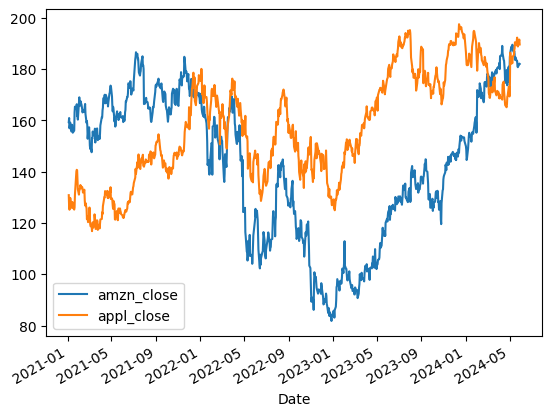

In [43]:
combined_df = pd.concat([amzn_history["Open"],amzn_history["Close"], appl_history["Close"], appl_history["Open"]],keys=["amzn_open","amzn_close", "appl_open", "appl_close"], axis=1)
combined_df[['amzn_close', 'appl_close']].plot()

Below relates to Question 2

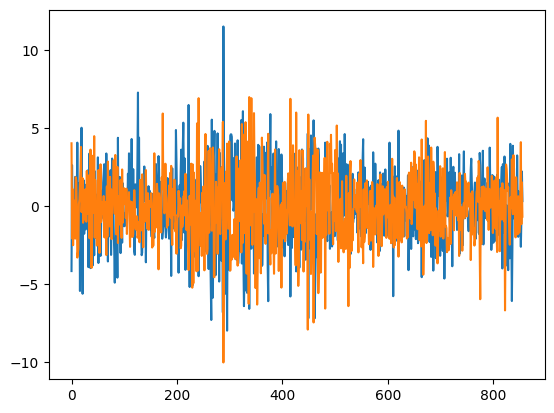

In [44]:
daily_return_df = combined_df[['amzn_close', 'appl_close' ]].values - combined_df[['amzn_open', 'appl_open']].values

plt.plot(daily_return_df)

Below relates to Question 3

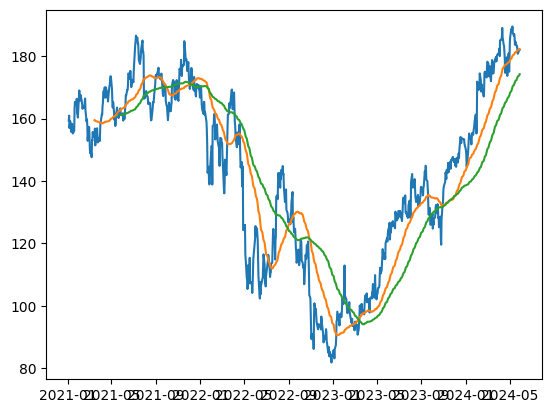

In [45]:
plt.plot(amzn_history["Close"])
plt.plot(amzn_history["Close"].rolling(50).mean())
plt.plot(amzn_history["Close"].rolling(100).mean())
plt.show()
#print(np.intersect1d(amzn_history["Close"].rolling(50).mean(), amzn_history["Close"].rolling(100).mean() ))
def find_crossings(time_series1, time_series2):
    # Ensure both time series are numpy arrays
    time_series1 = np.asarray(time_series1)
    time_series2 = np.asarray(time_series2)

    # Check if time series are of the same length
    if time_series1.shape != time_series2.shape:
        raise ValueError("Both time series must be of the same length")

    # Find where the time series cross
    crossings = np.where(np.diff(np.sign(time_series1 - time_series2)))[0]

    return crossings

#crossings = find_crossings(amzn_history["Close"].rolling(50).mean().values[-600:], amzn_history["Close"].rolling(100).mean().values[-600:])
#print(crossings)
#plt.plot(amzn_history["Close"].rolling(50).mean().values[-600:], 'r')
#plt.plot(amzn_history["Close"].rolling(100).mean().values[-600:], 'b')

Below relates to Question 4

In [46]:
combined_df.corr()

,amzn_open,amzn_close,appl_open,appl_close
amzn_open,1.000000,0.996576,0.097586,0.102090
amzn_close,0.996576,1.000000,0.100855,0.099704
appl_open,0.097586,0.100855,1.000000,0.994570
appl_close,0.102090,0.099704,0.994570,1.000000


The following cells relate to Question 6

In [47]:
from sklearn.preprocessing import MinMaxScaler

amzn_close = amzn_history[["Close"]].values.astype('float32')
amzn_open = amzn_history[["Open"]].values.astype('float32')
amzn_high = amzn_history[["High"]].values.astype('float32')
amzn_low = amzn_history[["Low"]].values.astype('float32')

# scaler1 = MinMaxScaler()
# scaler1.fit(amzn_close)
# amzn_close = scaler1.transform(amzn_close)

# scaler2 = MinMaxScaler()
# scaler2.fit(amzn_close)
# aapl_close = scaler2.transform(amzn_close)

In [48]:
print(np.sqrt(np.mean((amzn_open-amzn_close)**2)))

2.3571618


In [49]:
train_size = int(len(amzn_close) * 0.67)
test_size = len(amzn_close) - train_size
# train, test = amzn_close[:train_size], amzn_close[train_size:]
train, test = np.concatenate((amzn_close[:train_size], amzn_open[:train_size], amzn_high[:train_size], amzn_low[:train_size]), axis=1), np.concatenate((amzn_close[train_size:], amzn_open[train_size:], amzn_high[train_size:], amzn_low[train_size:]), axis=1)

In [50]:
train

array([[159.3315, 163.5   , 163.6   , 157.201 ],
       [160.9255, 158.3005, 161.169 , 158.253 ],
       [156.919 , 157.324 , 159.8755, 156.558 ],
       ...,
       [ 99.92  , 100.8   , 101.    ,  99.01  ],
       [ 97.83  , 100.4   , 100.51  ,  97.71  ],
       [102.4   ,  98.95  , 102.57  ,  98.71  ]], dtype=float32)

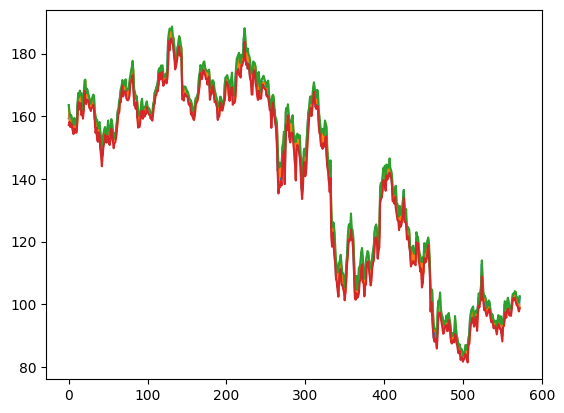

In [51]:
plt.plot(train)

In [52]:
test

array([[102.51, 102.07, 103.2 , 101.11],
       [102.74, 103.16, 103.73, 101.59],
       [102.3 , 103.95, 104.2 , 101.52],
       ...,
       [180.75, 181.65, 182.44, 180.3 ],
       [182.15, 179.93, 182.24, 179.49],
       [182.02, 181.7 , 184.08, 181.55]], dtype=float32)

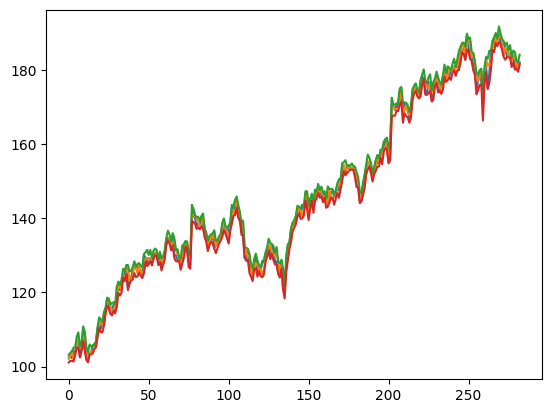

In [53]:
plt.plot(test)

In [54]:
import torch

def create_dataset(dataset, lookback):
    """Transform a time series into a prediction dataset

    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        lookback: Size of window for prediction
    """
    X, y = [], []
    for i in range(len(dataset)-lookback):
        feature = dataset[i:i+lookback]
        target = dataset[i+1:i+lookback+1, [0]]
        X.append(feature)
        y.append(target)
    return torch.tensor(np.array(X)), torch.tensor(np.array(y))

In [55]:
lookback = 21
X_train, y_train = create_dataset(train, lookback=lookback)
X_test, y_test = create_dataset(test, lookback=lookback)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([552, 21, 4]) torch.Size([552, 21, 1])
torch.Size([262, 21, 4]) torch.Size([262, 21, 1])


In [56]:
from model import ForecastModel
from torchinfo import summary
model = ForecastModel()
summary(model, input_data=X_train)

Layer (type:depth-idx)                   Output Shape              Param #
ForecastModel                            [552, 21, 1]              1
├─LSTM: 1-1                              [552, 21, 100]            83,200
├─Linear: 1-2                            [552, 21, 100]            10,100
├─Linear: 1-3                            [552, 21, 100]            10,100
├─Linear: 1-4                            [552, 21, 1]              101
Total params: 103,502
Trainable params: 103,502
Non-trainable params: 0
Total mult-adds (M): 975.66
Input size (MB): 0.19
Forward/backward pass size (MB): 27.91
Params size (MB): 0.41
Estimated Total Size (MB): 28.51

In [57]:
import torch.optim as optim
import torch.utils.data as data
import torch.nn as nn

device = "cuda" if torch.cuda.is_available() else "cpu"

model = ForecastModel()
model.cuda(device)


optimizer = optim.RAdam(model.parameters(),lr=1e-4, weight_decay=0.0001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.5)

loss_fn = nn.MSELoss()
loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=8, pin_memory=True)

n_epochs = 1000
train_rmse_list = []
test_rmse_list = []

minimum_state_dict = None
minimum_rmse = None

for epoch in range(n_epochs):
    model.to(device)
    model.train()
    for X_batch, y_batch in loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1)
        optimizer.step()

    scheduler.step()
    # Validation
    if epoch % 100 != 0:
        continue
    model.eval()
    with torch.no_grad():
        model.to("cpu")
        y_pred = model(X_train)
        train_rmse = np.sqrt(loss_fn(y_pred, y_train))
        train_rmse_last = np.sqrt(loss_fn(y_pred[:, -1,:], y_train[:, -1,:]))
        train_rmse_list.append(train_rmse)
        y_pred = model(X_test)
        test_rmse = np.sqrt(loss_fn(y_pred, y_test))
        test_rmse_last = np.sqrt(loss_fn(y_pred[:, -1,:], y_test[:, -1,:]))
        test_rmse_list.append(test_rmse)

        if minimum_rmse is None or test_rmse < minimum_rmse:
            minimum_rmse = test_rmse
            minimum_state_dict = model.state_dict()
    print("Epoch %d: train RMSE %.4f, train RMSE last %.4f, test RMSE %.4f, test RMSE last %.4f" % (epoch, train_rmse, train_rmse_last, test_rmse, test_rmse_last))

print("minimum test_rmse: ", minimum_rmse)

Epoch 0: train RMSE 144.1329, train RMSE last 143.1205, test RMSE 148.2456, test RMSE last 151.1233
Epoch 100: train RMSE 2.3372, train RMSE last 4.8528, test RMSE 2.2799, test RMSE last 5.5239
Epoch 200: train RMSE 2.0519, train RMSE last 4.2326, test RMSE 2.0352, test RMSE last 4.5974
Epoch 300: train RMSE 1.9373, train RMSE last 3.9973, test RMSE 1.8753, test RMSE last 4.3138
Epoch 400: train RMSE 1.8804, train RMSE last 3.9125, test RMSE 1.7464, test RMSE last 3.9971
Epoch 500: train RMSE 1.8240, train RMSE last 3.8680, test RMSE 1.6940, test RMSE last 3.9040
Epoch 600: train RMSE 1.7855, train RMSE last 3.8271, test RMSE 1.6518, test RMSE last 3.8692
Epoch 700: train RMSE 1.7811, train RMSE last 3.8069, test RMSE 1.6361, test RMSE last 3.8008
Epoch 800: train RMSE 1.7640, train RMSE last 3.7985, test RMSE 1.6194, test RMSE last 3.7609
Epoch 900: train RMSE 1.7614, train RMSE last 3.7942, test RMSE 1.6188, test RMSE last 3.7753
minimum test_rmse:  tensor(1.6188)


In [58]:
from xgboost import XGBRegressor, XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import hyperopt as hp
from sklearn.model_selection import train_test_split, GridSearchCV

bst = XGBRegressor(device = "cuda", booster="gbtree", objective="reg:squarederror")
bst.fit(X_train.reshape(-1, 84), y_train.reshape(-1, 21))

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cuda', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [59]:
test_pred = bst.predict(X_test.reshape(-1, 84))
print(X_test.reshape(-1, 84).shape)
print(test_pred.shape)
print(np.sqrt(((np.expand_dims(test_pred,axis=1)-np.array(y_test))**2).mean()))

torch.Size([262, 84])
(262, 21)
6.077798


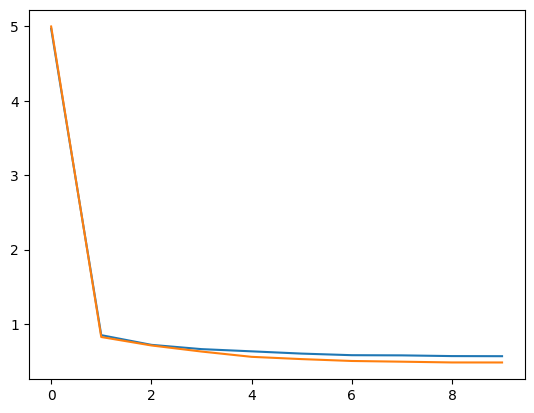

In [60]:
plt.plot(np.log(np.array(train_rmse_list)))
plt.plot(np.log(np.array(test_rmse_list)))

3.7753396


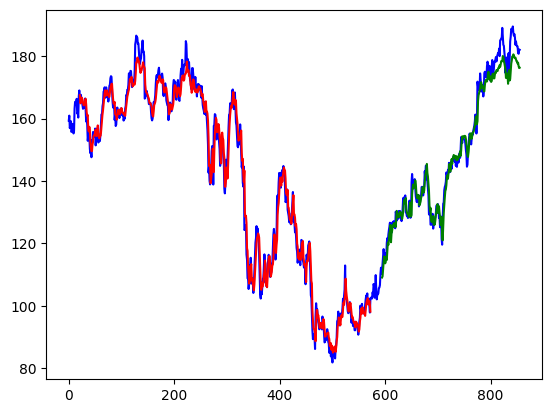

In [61]:
model.load_state_dict(minimum_state_dict)

model.to("cpu")
X_train, X_test = X_train.to("cpu"), X_test.to("cpu")
model.eval()
with torch.no_grad():
    # shift train predictions for plotting
    train_plot = np.ones_like(amzn_close) * np.nan
    y_pred = model(X_train)
    y_pred = y_pred[:, -1, :]
    train_plot[lookback:train_size] = model(X_train)[:, -1, :]
    # shift test predictions for plotting
    test_plot = np.ones_like(amzn_close) * np.nan
    test_plot[train_size+lookback:len(amzn_close)] = model(X_test)[:, -1, :]
    print(np.sqrt(mean_squared_error(y_test[:, -1,:], model(X_test)[:, -1, :])))
# plot
plt.plot(amzn_close, c='b')
plt.plot(train_plot, c='r')
plt.plot(test_plot, c='g')

# plt.plot(scaler1.inverse_transform(amzn_close), c='b')
# plt.plot(scaler1.inverse_transform(train_plot), c='r')
# plt.plot(scaler1.inverse_transform(test_plot), c='g')
plt.show()


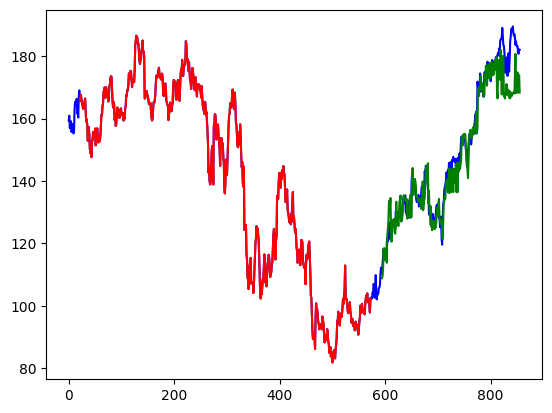

In [62]:
train_plot = np.ones_like(amzn_close) * np.nan
y_pred = bst.predict(X_train.reshape(-1, 84))
y_pred = y_pred[:, -1]
train_plot[lookback:train_size] = np.expand_dims(bst.predict(X_train.reshape(-1, 84))[:, -1], axis=1)
# shift test predictions for plotting
test_plot = np.ones_like(amzn_close) * np.nan
test_plot[train_size+lookback:len(amzn_close)] = np.expand_dims(bst.predict(X_test.reshape(-1, 84))[:, -1], axis=1)
# plot
plt.plot(amzn_close, c='b')
plt.plot(train_plot, c='r')
plt.plot(test_plot, c='g')

# plt.plot(scaler1.inverse_transform(amzn_close), c='b')
# plt.plot(scaler1.inverse_transform(train_plot), c='r')
# plt.plot(scaler1.inverse_transform(test_plot), c='g')
plt.show()